In [18]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("..")
import AnalyzeSymAsym as asa

In [19]:
BASE = Path("../SymAsymRNN") / "N100T100" / "lambda0p50"

# Pick the conditions you want to compare
conditions = {
    "baseline • none • asym1": pd.read_csv(
        BASE / "baseline/none/asym1/analysis/timeseries_metrics.csv"
    ),
    "centcycmh • frobenius • asym1": pd.read_csv(
        BASE / "centcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    # "centcyctridiag • frobenius • asym1": pd.read_csv(
    #    BASE / "centcyctridiag/frobenius/asym1/analysis/timeseries_metrics.csv"
    # ),
    "centmh • frobenius • asym1": pd.read_csv(
        BASE / "centmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "cycshift • frobenius • asym1": pd.read_csv(
        BASE / "cycshift/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    # "identity • frobenius • asym1": pd.read_csv(
    #    BASE / "identity/frobenius/asym1/analysis/timeseries_metrics.csv"
    # ),
    # "shift • frobenius • asym1": pd.read_csv(
    #    BASE / "shift/frobenius/asym1/analysis/timeseries_metrics.csv"
    # ),
    # "shiftcycmh • frobenius • asym1": pd.read_csv(
    #    BASE / "shiftcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    # ),
    # "shiftcyctridiag • frobenius • asym1": pd.read_csv(
    #    BASE / "shiftcyctridiag/frobenius/asym1/analysis/timeseries_metrics.csv"
    # ),
    # "shiftmh • frobenius • asym1": pd.read_csv(
    #    BASE / "shiftmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    # ),
}

condition_roots = {
    "baseline • none • asym1": BASE / "baseline/none/asym1/multiruns",
    "centcycmh • frobenius • asym1": BASE / "centcycmh/frobenius/asym1/multiruns",
    # "centcyctridiag • frobenius • asym1": BASE
    # / "centcyctridiag/frobenius/asym1/multiruns",
    "centmh • frobenius • asym1": BASE / "centmh/frobenius/asym1/multiruns",
    "cycshift • frobenius • asym1": BASE / "cycshift/frobenius/asym1/multiruns",
    # "identity • frobenius • asym1": BASE / "identity/frobenius/asym1/multiruns",
    # "shift • frobenius • asym1": BASE / "shift/frobenius/asym1/multiruns",
    # "shiftcycmh • frobenius • asym1": BASE / "shiftcycmh/frobenius/asym1/#multiruns",
    # "shiftcyctridiag • frobenius • asym1": BASE
    # / "shiftcyctridiag/frobenius/asym1/multiruns",
    # "shiftmh • frobenius • asym1": BASE / "shiftmh/frobenius/asym1/multiruns",
}

,condition,init_epoch,init_loss,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,0,0.177244,-0.000098,-1.983578,0.955870,7085.771163,0,29000
1,centcycmh • frobenius • asym1,0,0.181841,-0.000095,-2.414048,0.904574,7272.518848,0,29000
2,centmh • frobenius • asym1,0,0.181021,-0.000090,-2.428907,0.911396,7679.816185,0,29000
3,cycshift • frobenius • asym1,0,0.178267,-0.000090,-2.184055,0.923659,7730.164943,0,29000


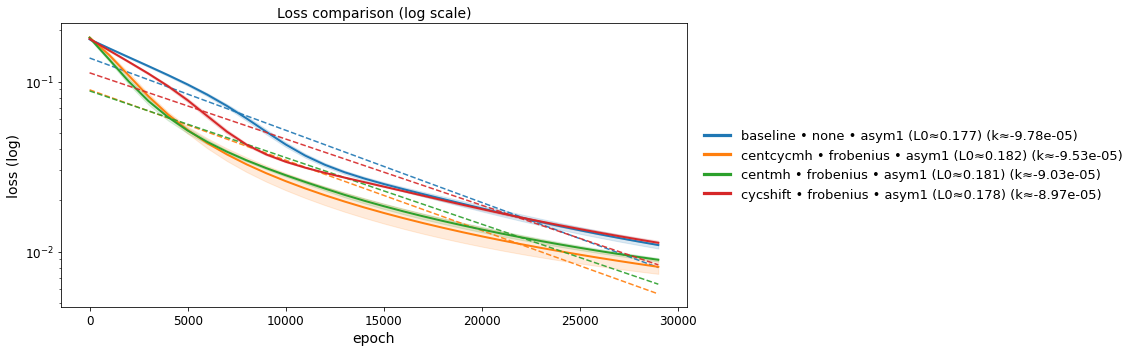

In [20]:
# Now overlay them
fit_stats = asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(20, 5),
    fit=True,
    fit_range=None,
    plot_fit=True,
    logy=True,
)
display(fit_stats)

../AnalyzeSymAsym.py:549: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(rect=(0.0, 0.0, 0.8, 1.0))


,condition,init_epoch,init_loss,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,0,0.177244,NaN,NaN,NaN,NaN,0,29000
1,centcycmh • frobenius • asym1,0,0.181841,NaN,NaN,NaN,NaN,0,29000
2,centmh • frobenius • asym1,0,0.181021,NaN,NaN,NaN,NaN,0,29000
3,cycshift • frobenius • asym1,0,0.178267,NaN,NaN,NaN,NaN,0,29000


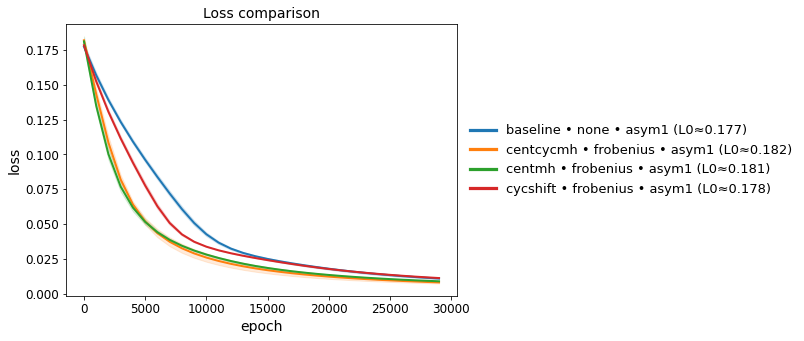

In [21]:
asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(7, 5),
    fit=False,
    fit_range=None,
    plot_fit=False,
    logy=False,
)

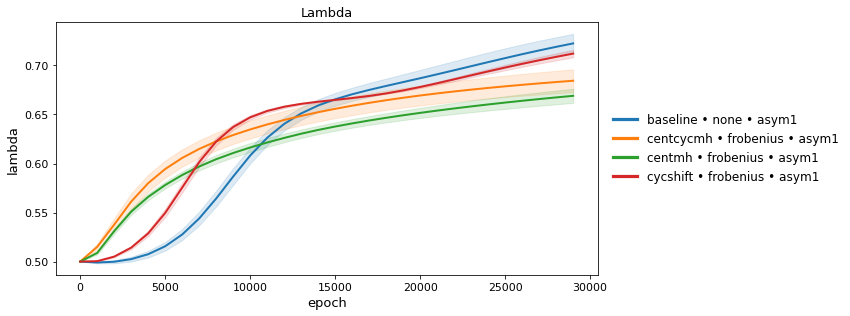

In [22]:
fit_spec = asa.overlay_metric(
    conditions,
    key="lambda",
    title="Lambda",
    fontsize=13,
    figsize=(15, 4.5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

../AnalyzeSymAsym.py:716: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(rect=(0.0, 0.0, 0.8, 1.0))


,condition,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,NaN,NaN,NaN,NaN,0,29000
1,centcycmh • frobenius • asym1,NaN,NaN,NaN,NaN,0,29000
2,centmh • frobenius • asym1,NaN,NaN,NaN,NaN,0,29000
3,cycshift • frobenius • asym1,NaN,NaN,NaN,NaN,0,29000


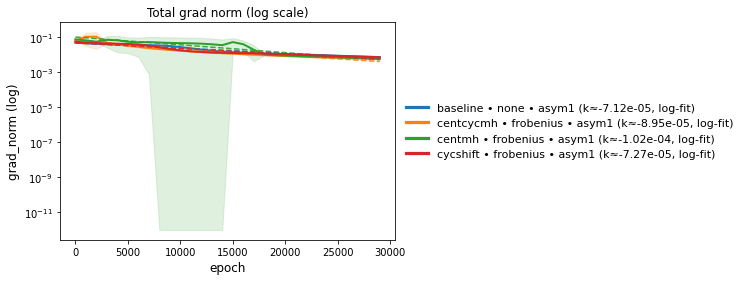

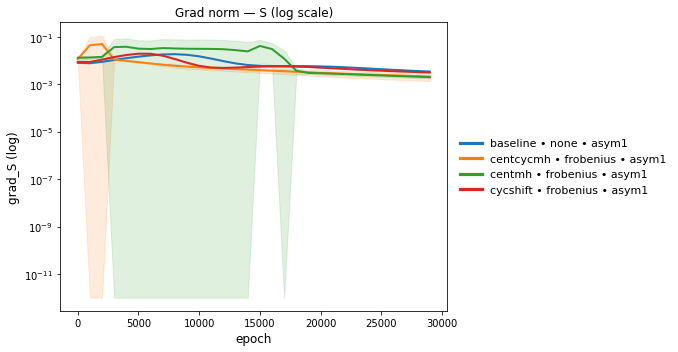

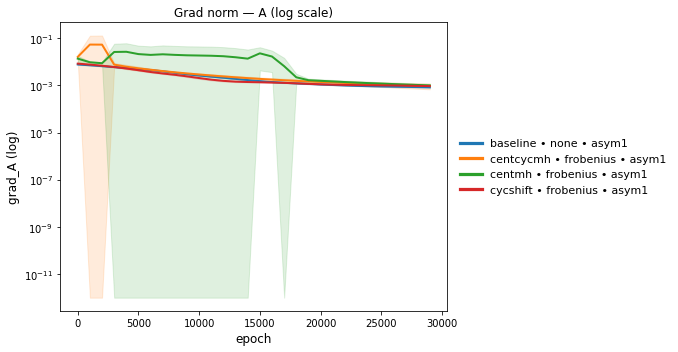

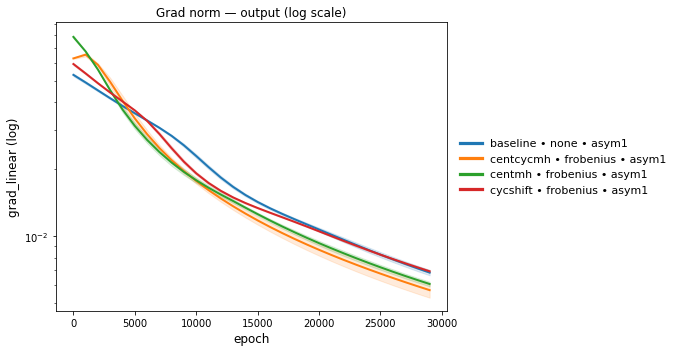

In [23]:
# total grad norm
asa.overlay_metric(
    conditions, key="grad_norm", title="Total grad norm", logy=True, fit=True
)

# per-group grad norms
asa.overlay_metric(
    conditions, key="grad_S", title="Grad norm — S", logy=True, figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="grad_A", title="Grad norm — A", logy=True, figsize=(12, 5)
)
asa.overlay_metric(
    conditions,
    key="grad_linear",
    title="Grad norm — output",
    logy=True,
    figsize=(12, 5),
)

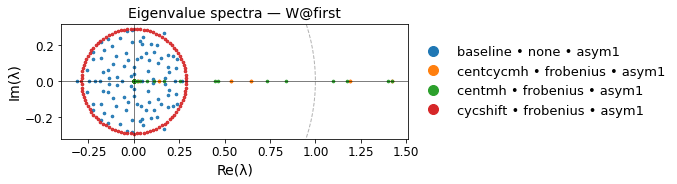

In [24]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="first",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

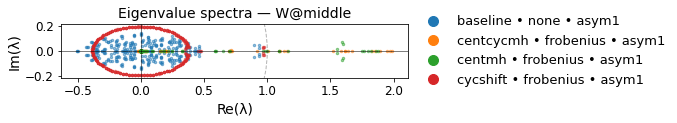

In [25]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="middle",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

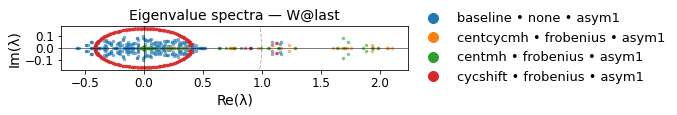

In [26]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="last",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

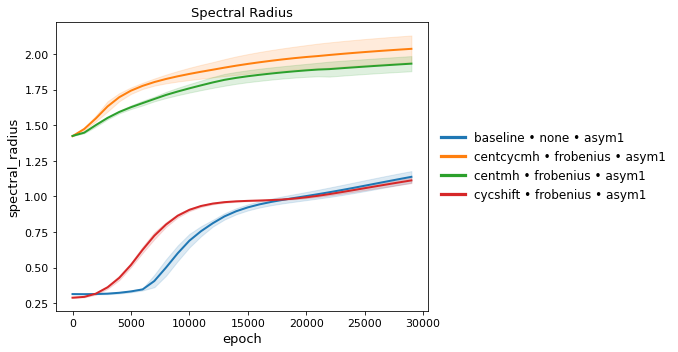

In [27]:
fit_spec = asa.overlay_metric(
    conditions,
    key="spectral_radius",
    title="Spectral Radius",
    fontsize=13,
    figsize=(12, 5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

,condition,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,NaN,NaN,NaN,NaN,0,29000
1,centcycmh • frobenius • asym1,NaN,NaN,NaN,NaN,0,29000
2,centmh • frobenius • asym1,NaN,NaN,NaN,NaN,0,29000
3,cycshift • frobenius • asym1,NaN,NaN,NaN,NaN,0,29000


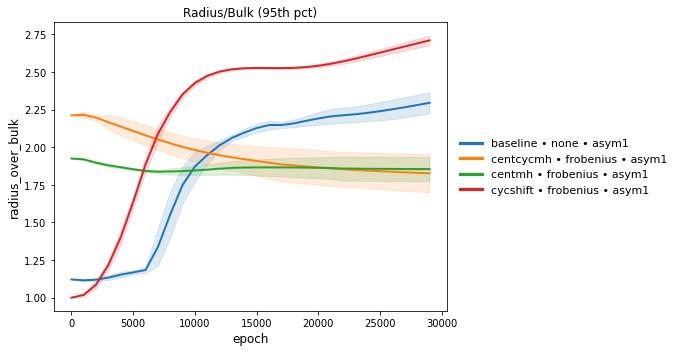

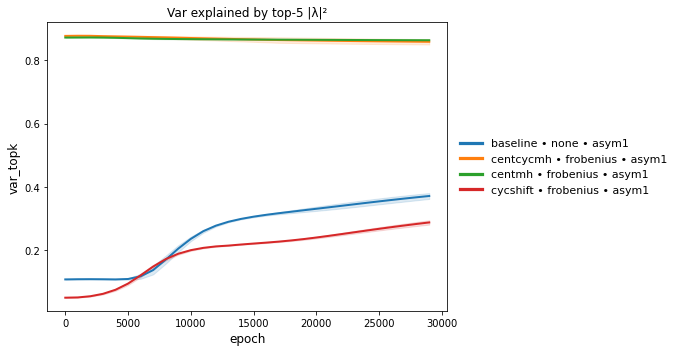

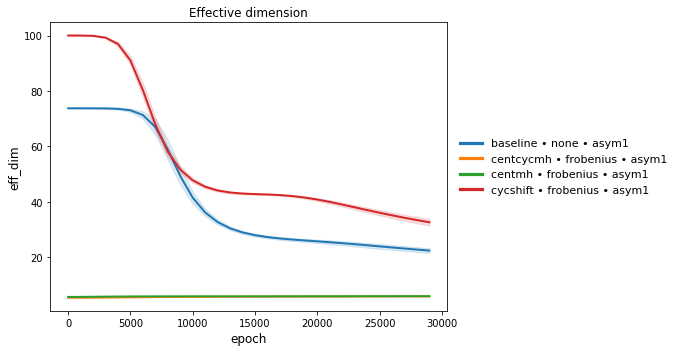

In [28]:
asa.overlay_metric(
    conditions, key="radius_over_bulk", title="Radius/Bulk (95th pct)", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="var_topk", title="Var explained by top-5 |λ|²", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="eff_dim", title="Effective dimension", figsize=(12, 5)
)

# Same init, different variants -- shift/identity

In [ ]:
BASE = Path("../SymAsymRNN") / "N100T100" / "lambda0p50"

# Pick the conditions you want to compare
conditions = {
    "baseline • none • asym1": pd.read_csv(
        BASE / "baseline/none/asym1/analysis/timeseries_metrics.csv"
    ),
    "cycshift • frobenius • asym1": pd.read_csv(
        BASE / "cycshift/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "identity • frobenius • asym1": pd.read_csv(
        BASE / "identity/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "shift • frobenius • asym1": pd.read_csv(
        BASE / "shift/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
}

condition_roots = {
    "baseline • none • asym1": BASE / "baseline/none/asym1/multiruns",
    "cycshift • frobenius • asym1": BASE / "cycshift/frobenius/asym1/multiruns",
    "identity • frobenius • asym1": BASE / "identity/frobenius/asym1/multiruns",
    "shift • frobenius • asym1": BASE / "shift/frobenius/asym1/multiruns",
}

,condition,init_epoch,init_loss,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,0,0.177244,-0.000098,-1.983578,0.955870,7085.771163,0,29000
1,cycshift • frobenius • asym1,0,0.178267,-0.000090,-2.184055,0.923659,7730.164943,0,29000
2,identity • frobenius • asym1,0,0.178309,-0.000098,-2.187336,0.932847,7051.130796,0,29000
3,shift • frobenius • asym1,0,0.178268,-0.000090,-2.182622,0.923881,7727.288443,0,29000


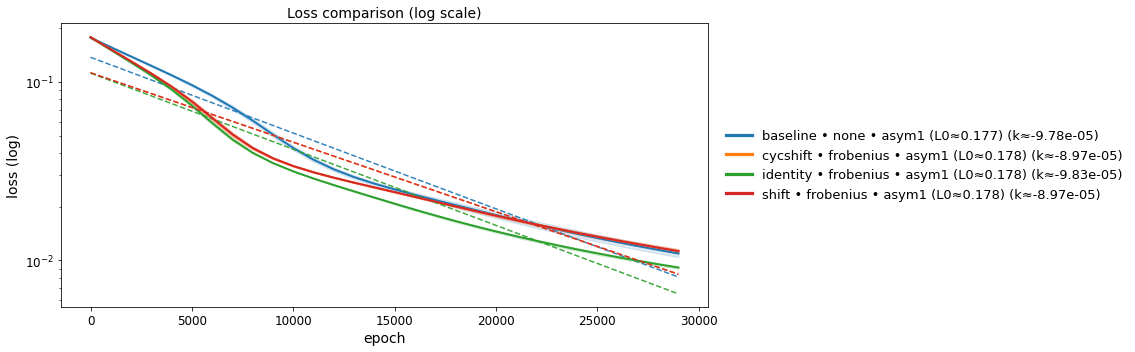

In [44]:
fit_stats = asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(20, 5),
    fit=True,
    fit_range=None,
    plot_fit=True,
    logy=True,
)
display(fit_stats)

,condition,init_epoch,init_loss,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,0,0.177244,NaN,NaN,NaN,NaN,0,29000
1,cycshift • frobenius • asym1,0,0.178267,NaN,NaN,NaN,NaN,0,29000
2,identity • frobenius • asym1,0,0.178309,NaN,NaN,NaN,NaN,0,29000
3,shift • frobenius • asym1,0,0.178268,NaN,NaN,NaN,NaN,0,29000


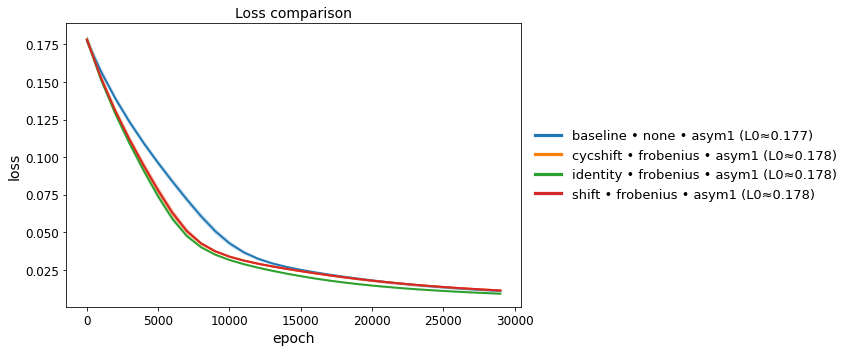

In [45]:
asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(15, 5),
    fit=False,
    fit_range=None,
    plot_fit=False,
    logy=False,
)

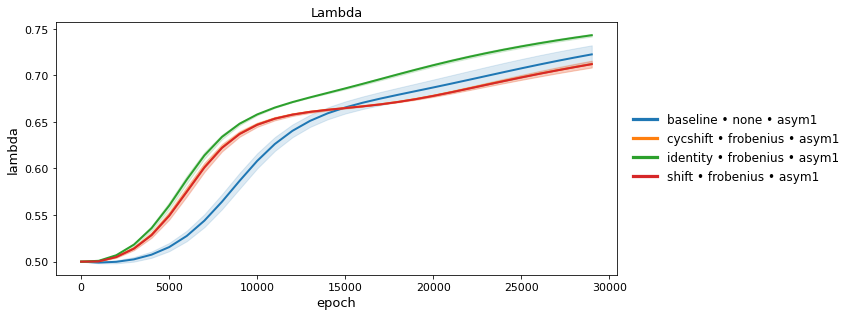

In [46]:
fit_spec = asa.overlay_metric(
    conditions,
    key="lambda",
    title="Lambda",
    fontsize=13,
    figsize=(15, 4.5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

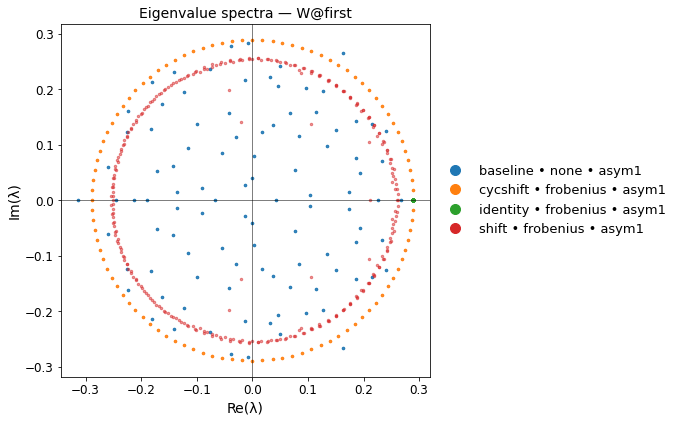

In [47]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="first",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

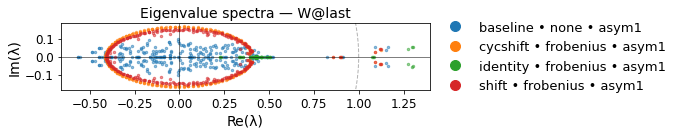

In [48]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="last",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

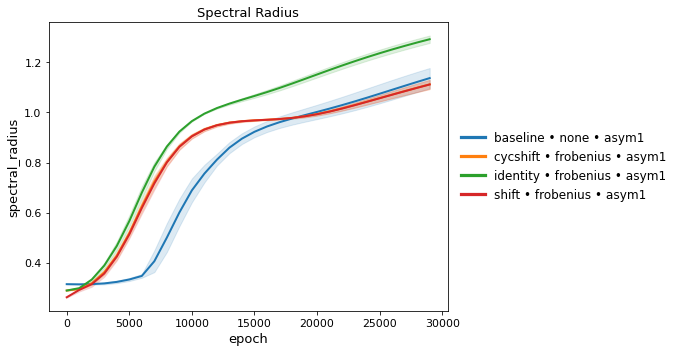

In [49]:
fit_spec = asa.overlay_metric(
    conditions,
    key="spectral_radius",
    title="Spectral Radius",
    fontsize=13,
    figsize=(12, 5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

,condition,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,NaN,NaN,NaN,NaN,0,29000
1,cycshift • frobenius • asym1,NaN,NaN,NaN,NaN,0,29000
2,identity • frobenius • asym1,NaN,NaN,NaN,NaN,0,29000
3,shift • frobenius • asym1,NaN,NaN,NaN,NaN,0,29000


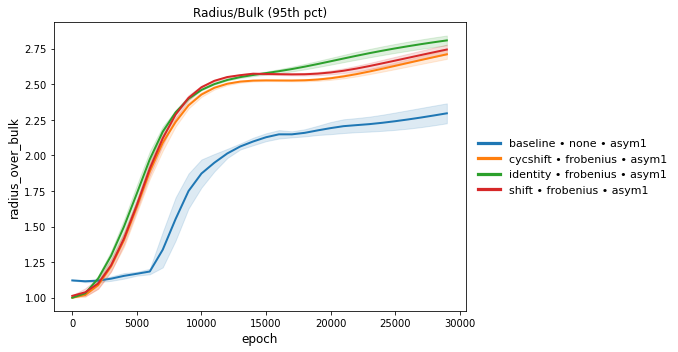

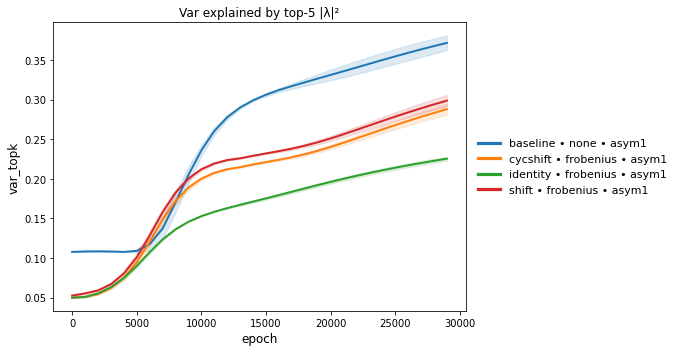

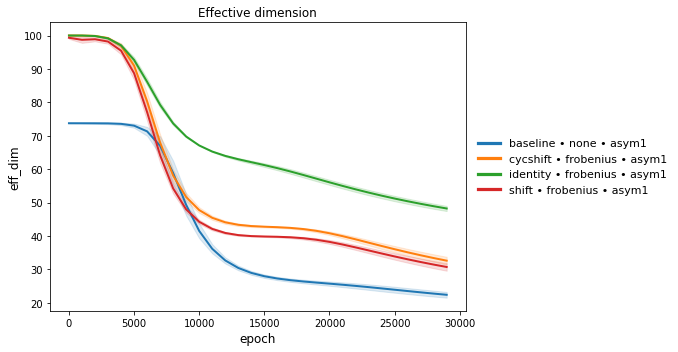

In [50]:
asa.overlay_metric(
    conditions, key="radius_over_bulk", title="Radius/Bulk (95th pct)", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="var_topk", title="Var explained by top-5 |λ|²", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="eff_dim", title="Effective dimension", figsize=(12, 5)
)

# Same init, different variant -- MH

In [ ]:
BASE = Path("../SymAsymRNN") / "N100T100" / "lambda0p50"

# Pick the conditions you want to compare
conditions = {
    "baseline • none • asym1": pd.read_csv(
        BASE / "baseline/none/asym1/analysis/timeseries_metrics.csv"
    ),
    "centcycmh • frobenius • asym1": pd.read_csv(
        BASE / "centcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "centmh • frobenius • asym1": pd.read_csv(
        BASE / "centmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "shiftcycmh • frobenius • asym1": pd.read_csv(
        BASE / "shiftcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "shiftmh • frobenius • asym1": pd.read_csv(
        BASE / "shiftmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
}

condition_roots = {
    "baseline • none • asym1": BASE / "baseline/none/asym1/multiruns",
    "centcycmh • frobenius • asym1": BASE / "centcycmh/frobenius/asym1/multiruns",
    "centmh • frobenius • asym1": BASE / "centmh/frobenius/asym1/multiruns",
    "shiftcycmh • frobenius • asym1": BASE / "shiftcycmh/frobenius/asym1/#multiruns",
    "shiftmh • frobenius • asym1": BASE / "shiftmh/frobenius/asym1/multiruns",
}

,condition,init_epoch,init_loss,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,0,0.177244,-0.000098,-1.983578,0.955870,7085.771163,0,29000
1,centcycmh • frobenius • asym1,0,0.181841,-0.000095,-2.414048,0.904574,7272.518848,0,29000
2,centmh • frobenius • asym1,0,0.181021,-0.000090,-2.428907,0.911396,7679.816185,0,29000
3,shiftcycmh • frobenius • asym1,0,0.179455,-0.000090,-2.036713,0.928993,7718.569202,0,29000
4,shiftmh • frobenius • asym1,0,0.176377,-0.000091,-1.951360,0.957138,7585.032921,0,29000


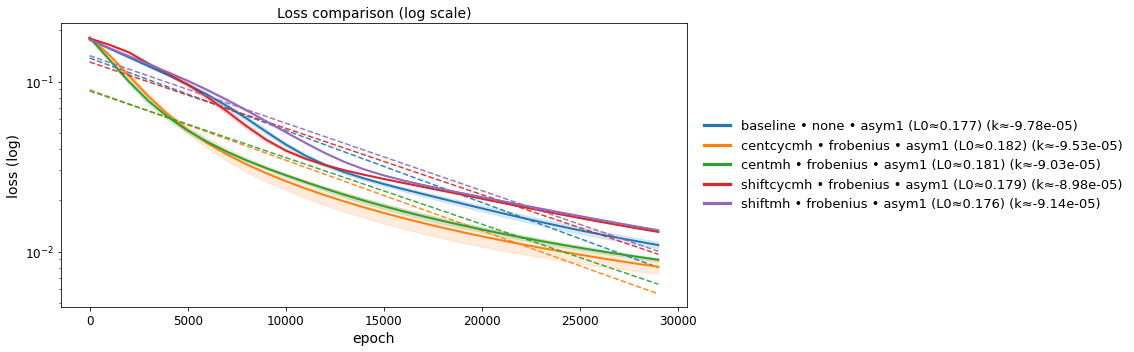

In [36]:
fit_stats = asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(20, 5),
    fit=True,
    fit_range=None,
    plot_fit=True,
    logy=True,
)
display(fit_stats)

,condition,init_epoch,init_loss,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,0,0.177244,NaN,NaN,NaN,NaN,0,29000
1,centcycmh • frobenius • asym1,0,0.181841,NaN,NaN,NaN,NaN,0,29000
2,centmh • frobenius • asym1,0,0.181021,NaN,NaN,NaN,NaN,0,29000
3,shiftcycmh • frobenius • asym1,0,0.179455,NaN,NaN,NaN,NaN,0,29000
4,shiftmh • frobenius • asym1,0,0.176377,NaN,NaN,NaN,NaN,0,29000


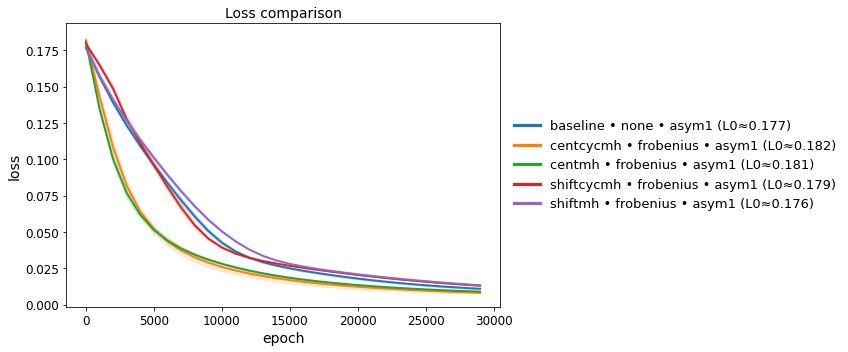

In [37]:
asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(15, 5),
    fit=False,
    fit_range=None,
    plot_fit=False,
    logy=False,
)

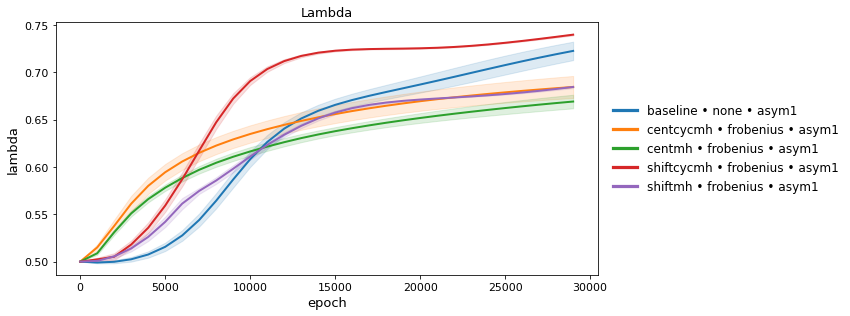

In [38]:
fit_spec = asa.overlay_metric(
    conditions,
    key="lambda",
    title="Lambda",
    fontsize=13,
    figsize=(15, 4.5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

[warn] no runs under ../SymAsymRNN/N100T100/lambda0p50/shiftcycmh/frobenius/asym1/#multiruns


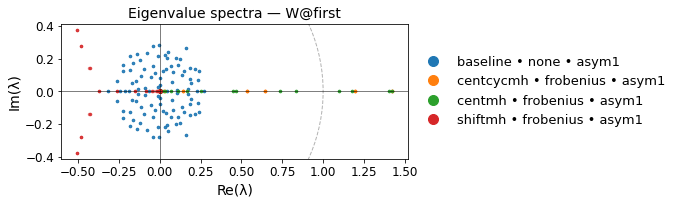

In [39]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="first",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

[warn] no runs under ../SymAsymRNN/N100T100/lambda0p50/shiftcycmh/frobenius/asym1/#multiruns


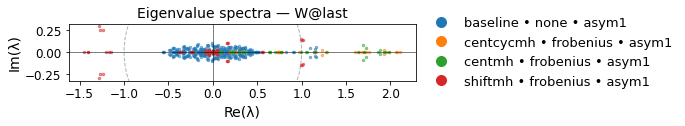

In [40]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="last",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

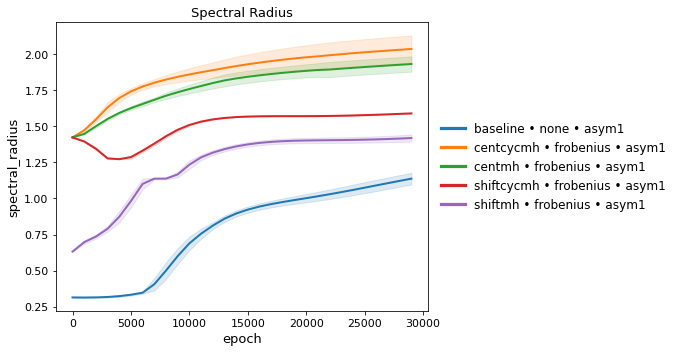

In [41]:
fit_spec = asa.overlay_metric(
    conditions,
    key="spectral_radius",
    title="Spectral Radius",
    fontsize=13,
    figsize=(12, 5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

,condition,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,NaN,NaN,NaN,NaN,0,29000
1,centcycmh • frobenius • asym1,NaN,NaN,NaN,NaN,0,29000
2,centmh • frobenius • asym1,NaN,NaN,NaN,NaN,0,29000
3,shiftcycmh • frobenius • asym1,NaN,NaN,NaN,NaN,0,29000
4,shiftmh • frobenius • asym1,NaN,NaN,NaN,NaN,0,29000


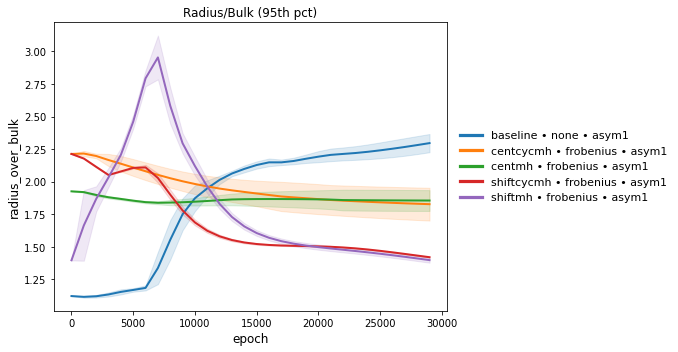

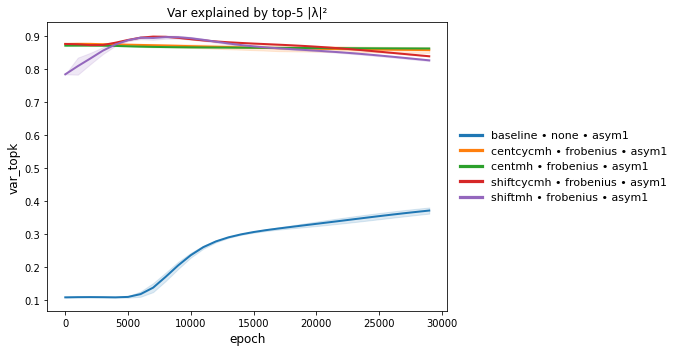

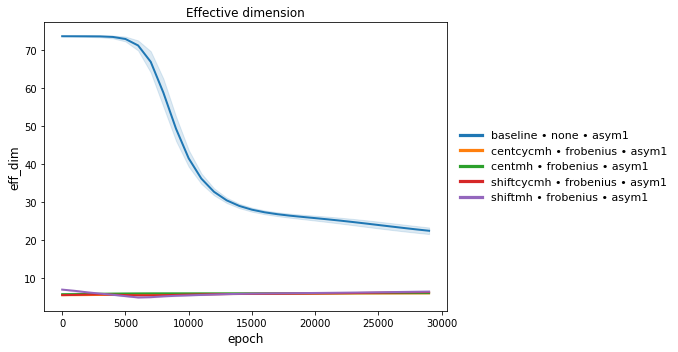

In [42]:
asa.overlay_metric(
    conditions, key="radius_over_bulk", title="Radius/Bulk (95th pct)", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="var_topk", title="Var explained by top-5 |λ|²", figsize=(12, 5)
)
asa.overlay_metric(
    conditions, key="eff_dim", title="Effective dimension", figsize=(12, 5)
)